In [5]:
import pandas as pd
Regression_Data = pd.read_csv("housing_price (1).csv")


In [7]:
Regression_Data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15,5612,1283,1015,472,1.4936,66900
1,-114.47,34.40,19,7650,1901,1129,463,1.8200,80100
2,-114.56,33.69,17,720,174,333,117,1.6509,85700
3,-114.57,33.64,14,1501,337,515,226,3.1917,73400
4,-114.57,33.57,20,1454,326,624,262,1.9250,65500


# Q1. Problem Statement: Linear Regression

## Load the housing_price.csv dataset to a DataFrame and perform the following tasks:

## The housing_price dataset contains all numeric data and the median_house_value column is our target variable, so with help of linear regression build a model that can predict accurate house prices.

### Perform the below task and build a model.

1. Load the housing_price dataset into DataFrame

2. Find the null value and drop it, if it is there

3. Split x and y into train and test data set based on test size as 0.2 and random_state as 10

4. Call the LinearRegression model then fit the model using train data

5. Print R2 vallue, coefficient and intercept

6. Compare actual and predicted values.

7. Print the final summary

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score ,confusion_matrix

import seaborn as sns


In [12]:
#1. Load The Data Set
df= pd.read_csv("housing_price (1).csv")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           17000 non-null  float64
 1   latitude            17000 non-null  float64
 2   housing_median_age  17000 non-null  int64  
 3   total_rooms         17000 non-null  int64  
 4   total_bedrooms      17000 non-null  int64  
 5   population          17000 non-null  int64  
 6   households          17000 non-null  int64  
 7   median_income       17000 non-null  float64
 8   median_house_value  17000 non-null  int64  
dtypes: float64(3), int64(6)
memory usage: 1.2 MB


In [14]:
#2 :- Find the null value and drop it, if it is there

df = pd.DataFrame(df)
print(df)


       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -114.31     34.19                  15         5612            1283   
1        -114.47     34.40                  19         7650            1901   
2        -114.56     33.69                  17          720             174   
3        -114.57     33.64                  14         1501             337   
4        -114.57     33.57                  20         1454             326   
...          ...       ...                 ...          ...             ...   
16995    -124.26     40.58                  52         2217             394   
16996    -124.27     40.69                  36         2349             528   
16997    -124.30     41.84                  17         2677             531   
16998    -124.30     41.80                  19         2672             552   
16999    -124.35     40.54                  52         1820             300   

       population  households  median_income  media

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           17000 non-null  float64
 1   latitude            17000 non-null  float64
 2   housing_median_age  17000 non-null  int64  
 3   total_rooms         17000 non-null  int64  
 4   total_bedrooms      17000 non-null  int64  
 5   population          17000 non-null  int64  
 6   households          17000 non-null  int64  
 7   median_income       17000 non-null  float64
 8   median_house_value  17000 non-null  int64  
dtypes: float64(3), int64(6)
memory usage: 1.2 MB


In [20]:
df.sample(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
9136,-119.02,35.42,36,2044,447,1021,374,1.8472,57400
5011,-118.11,33.82,37,1756,345,836,335,4.3750,218200
4326,-118.01,33.77,32,1771,296,995,272,5.8362,217500
8368,-118.46,34.00,39,4098,1100,2054,1053,2.9180,345600
698,-117.05,33.01,17,3430,425,1468,433,10.6186,429300


In [28]:
df.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64

In [22]:
#Step - 3 :
#No Missing Values
df.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64

In [24]:
#Step - 4 Separating Dependent And Independent Features Into New DataFrame

#REstructuring The DataFrame Into Dependent And Independent Data Frame

x = df.drop(columns="median_house_value")
y = df["median_house_value"]

print("Independent Data\n",x)
print("\ndependent Data\n",y)

Independent Data
        longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -114.31     34.19                  15         5612            1283   
1        -114.47     34.40                  19         7650            1901   
2        -114.56     33.69                  17          720             174   
3        -114.57     33.64                  14         1501             337   
4        -114.57     33.57                  20         1454             326   
...          ...       ...                 ...          ...             ...   
16995    -124.26     40.58                  52         2217             394   
16996    -124.27     40.69                  36         2349             528   
16997    -124.30     41.84                  17         2677             531   
16998    -124.30     41.80                  19         2672             552   
16999    -124.35     40.54                  52         1820             300   

       population  households  me

In [30]:
y.value_counts()

median_house_value
500001    814
137500     95
162500     89
112500     85
187500     74
         ... 
316600      1
391300      1
392200      1
328200      1
80500       1
Name: count, Length: 3694, dtype: int64

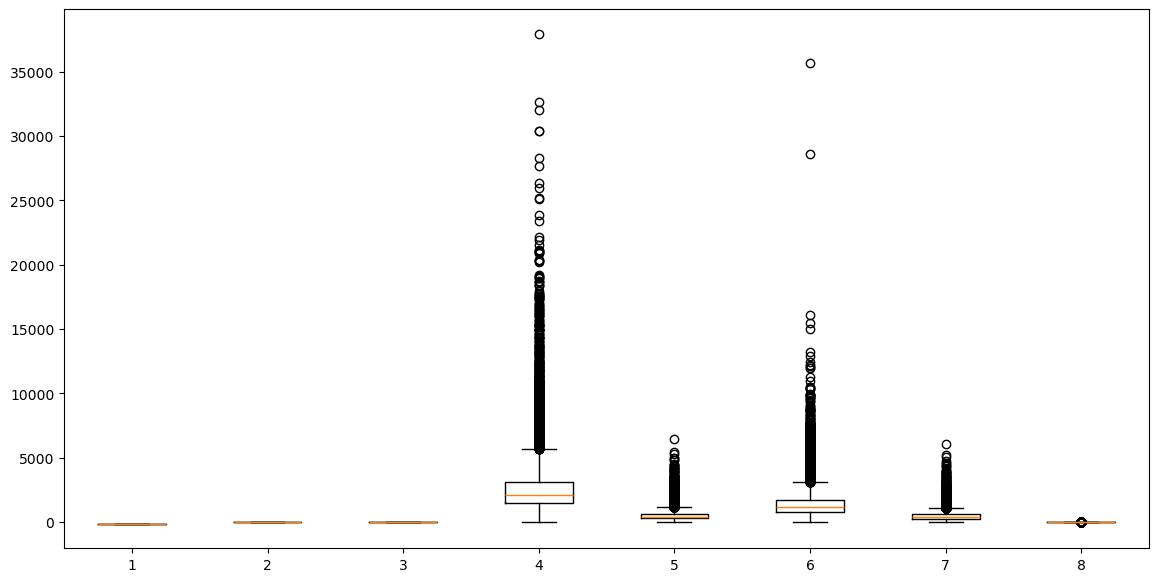

In [26]:
plt.figure(figsize=(14,7))
plt.boxplot(x)
plt.show()

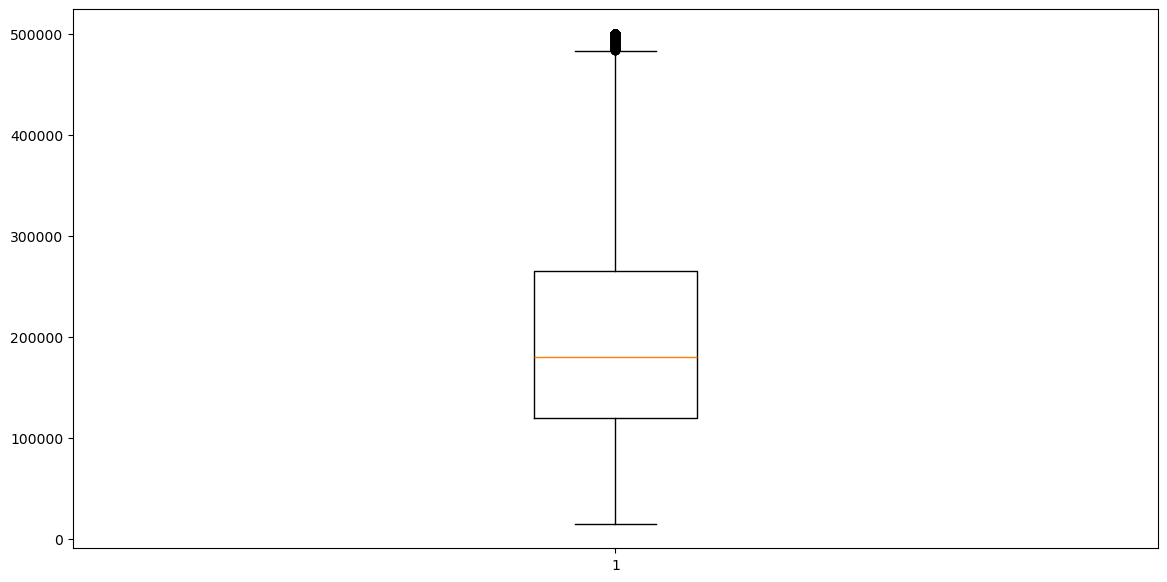

In [31]:
plt.figure(figsize=(14,7))
plt.boxplot(y)
plt.show()

In [15]:
#Step - 5 : Seperating X And Y Dataframe FOr Test And Train

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=10)

#Check SHape OF The DAta



print("x_Train And x_Test Data SHape", x_train.shape,x_test.shape)
print("Y_Train And Y Test Data Shape", y_train.shape,y_test.shape)

x_Train And x_Test Data SHape (13600, 8) (3400, 8)
Y_Train And Y Test Data Shape (13600,) (3400,)


In [17]:
#Step - 6: Call Linear Regression Model And us fit() Method With Train DataSet For Training

#Call Model And Fit The Model
# Using Train Data.
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [26]:
#Find Actual Vs Prediction

y_pred = model.predict(x_test)
y_pred

array([ -8475.67520212, 490876.39423322, 112662.10798956, ...,
       156916.65206656, 283319.26612848, 324366.41435786])

In [36]:
#Step - 7: Printing R2 Value , Coeffcient And Intercept

#Print r2 Value
model.score(x_test,y_test)

0.6484403017760366

In [38]:
#Print Coefficient And Intercept
print("R2 Value",model.score(x_test,y_test))
print("\ncoefficient:\n",model.coef_)
print("\nintercept:",model.intercept_)


R2 Value 0.6484403017760366

coefficient:
 [-4.34225673e+04 -4.34584915e+04  1.15417922e+03 -8.34683693e+00
  1.14234465e+02 -3.87425498e+01  5.04252279e+01  4.02554220e+04]

intercept: -3635200.010897859


In [40]:
#Step - 8: Using Train Model Predict For Test Data And Than Compare With Original Test Data.

In [44]:
pred = pd.DataFrame({"Actual": y_test, "Predict":y_pred})
df1 = pred.head(10)
df1

,Actual,Predict
0,96100,-8475.675202
1,500001,490876.394233
2,177200,112662.107990
3,55000,218093.753334
4,220800,207600.925885
5,158300,121540.170888
6,37900,180602.126583
7,115600,104694.108104
8,359700,310765.123759
9,203300,265864.990208


<Axes: >

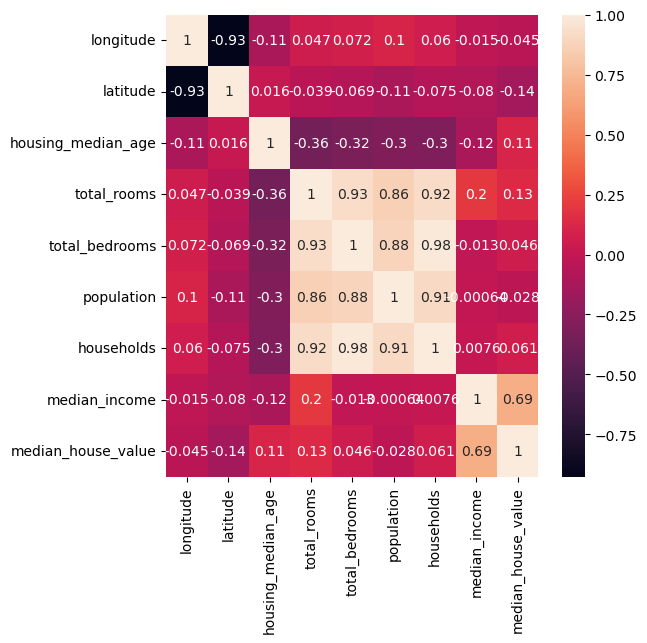

In [23]:
mat_conf = df.corr()
top_feature = mat_conf.index

plt.figure(figsize=(6,6))
sns.heatmap(df[top_feature].corr(),annot=True)